# 1. CNN 실습
- MNIST 데이터셋: digits, fashion image
- DNN VS CNN

In [1]:
#MNIST DNN Review

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)


11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#min_max scaling / flattening
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(16, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 학습
history = model.fit(x_train, y_train, epochs = 10,
                    batch_size = 128, validation_data = (x_val,y_val))
history.history.keys()

Epoch 1/10
329/329 [==============================] - 11s 13ms/step - loss: 0.5778 - acc: 0.8363 - val_loss: 0.2652 - val_acc: 0.9217
Epoch 2/10
329/329 [==============================] - 3s 11ms/step - loss: 0.2100 - acc: 0.9401 - val_loss: 0.1945 - val_acc: 0.9418
Epoch 3/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1585 - acc: 0.9548 - val_loss: 0.1634 - val_acc: 0.9508
Epoch 4/10
329/329 [==============================] - 4s 12ms/step - loss: 0.1302 - acc: 0.9611 - val_loss: 0.1460 - val_acc: 0.9554
Epoch 5/10
329/329 [==============================] - 3s 10ms/step - loss: 0.1096 - acc: 0.9685 - val_loss: 0.1535 - val_acc: 0.9538
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0960 - acc: 0.9717 - val_loss: 0.1273 - val_acc: 0.9622
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0832 - acc: 0.9751 - val_loss: 0.1298 - val_acc: 0.9617
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - lo

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

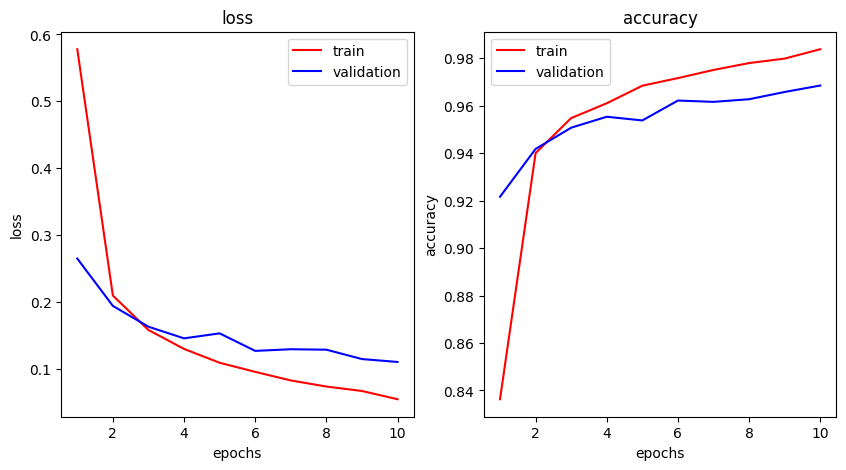

313/313 [==============================] - 1s 2ms/step

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.95      0.96      0.95       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [4]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,11 ) #1~10 epoch

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(x_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(x_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

- CNN으로 적용

In [5]:
#CNN
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1) #이미지 한장의 크기, 1: 흑백이미지

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [6]:

#MinMax Scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Reshape for CNN
print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0],28,28,1) #4차원으로 만들어줌
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(60000, 28, 28)


(10000, 28, 28, 1)

In [7]:
#One hot encoding Y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [11]:
#은닉층 구성
model = keras.Sequential()
model.add( layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (28, 28, 1)) )
model.add(  layers.MaxPooling2D(pool_size=(2,2)))
model.add(  layers.Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( layers.MaxPooling2D(pool_size=(2,2)) )

model.add(  layers.Flatten() )  #3차원 이미지->한줄짜리로...
model.add( layers.Dense(16,activation='relu') )
model.add( layers.Dropout(0.25) )
# model.add( layers.Dropout(0.5) )  #drop out 50% 지정
model.add( layers.Dense(num_classes,activation='softmax') )


In [12]:
#Compile + Fit
batch_size = 128
epoch =10
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)
#한 epoch, X_train의 10%를 random하게 선택해서 validation에 사용

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 0.5642 - accuracy: 0.8194 - val_loss: 0.0874 - val_accuracy: 0.9747
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2315 - accuracy: 0.9270 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1819 - accuracy: 0.9424 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.1544 - accuracy: 0.9497 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1382 - accuracy: 0.9556 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1266 - accuracy: 0.9582 - val_loss: 0.0374 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9610 - val_loss: 0.0348 - val_accuracy: 0.9907
Epoch 

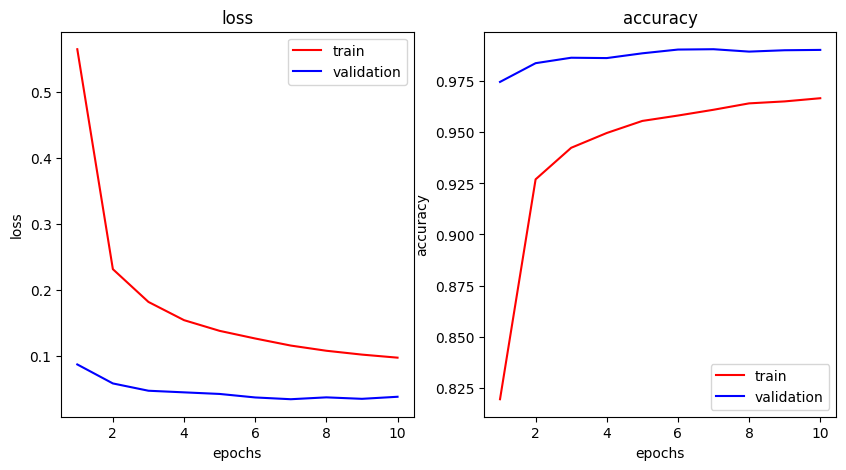

313/313 [==============================] - 1s 2ms/step

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']
epochs = np.arange(epoch)+1

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(X_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



In [14]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[1.7177485e-09, 3.2300747e-07, 3.9646927e-10, ..., 9.9999964e-01,
        1.0359646e-12, 1.2191035e-08],
       [3.3756912e-08, 1.6384602e-08, 1.0000000e+00, ..., 2.0076318e-09,
        1.6910534e-09, 4.2012414e-13],
       [4.9347717e-09, 9.9999940e-01, 5.5290364e-08, ..., 2.9971807e-09,
        5.7834462e-09, 3.0222581e-11],
       ...,
       [5.8892884e-17, 6.3796448e-09, 2.8625847e-12, ..., 7.3631526e-12,
        1.2011170e-12, 5.5981442e-11],
       [1.6315127e-08, 6.0293960e-14, 2.3909499e-12, ..., 8.6446416e-17,
        4.2199753e-07, 2.8165812e-09],
       [1.9540682e-09, 1.4573878e-12, 5.6839459e-12, ..., 6.4644632e-18,
        7.1928287e-13, 9.4470604e-17]], dtype=float32)

In [15]:
model.predict(X_test)[0]

313/313 [==============================] - 1s 2ms/step


array([1.7177485e-09, 3.2300747e-07, 3.9646927e-10, 4.3387272e-10,
       1.6383832e-10, 2.1031567e-13, 1.2390787e-12, 9.9999964e-01,
       1.0359646e-12, 1.2191035e-08], dtype=float32)

In [16]:
np.argmax(results[0], axis = -1)

7

# 2. Fashion Image Dataset
- CNN을 적용, fully connected 부분에 은닉층을 추가
- Conv에서 필터 크기와 개수 조정

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


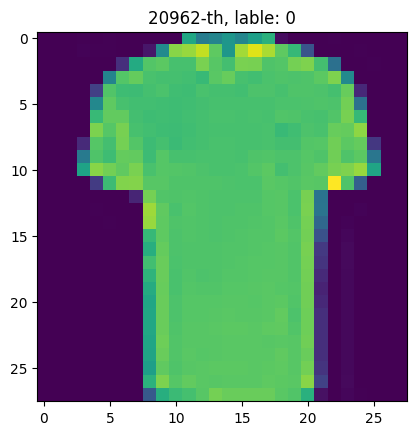

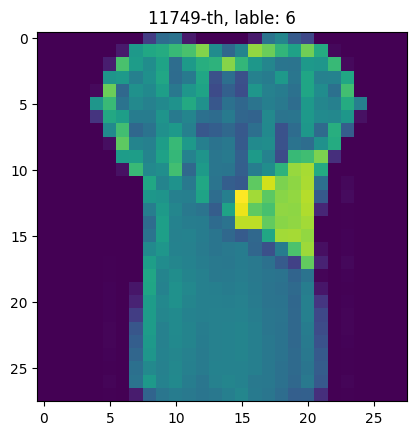

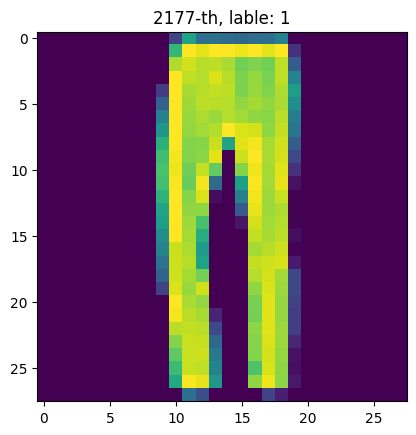

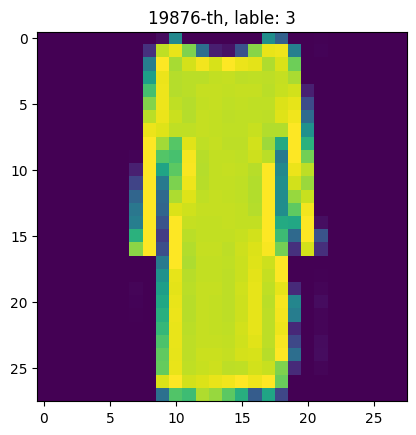

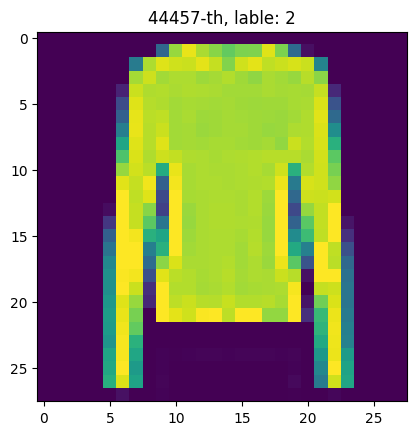

In [12]:
#Fashion Image Dataset
from tensorflow.keras.datasets import fashion_mnist

# mnist의 패션 데이터
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 5
# 0 ~ 59999 중 무작위 5개
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th, lable: %d' %(idx, label))

#표준화 및 reshape, 각 이미지가 28,28,1이 되도록 ->4차원 array를 생성
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1)) #-1은 원래 array의 개수를 따름, 60000개 의미
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1)) #-1은 10000개 의미

print(x_train.shape)
from tensorflow.keras.utils import to_categorical
# Y 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# validation 생성
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 12345)

In [13]:
x_train.shape
y_train.shape

(42000, 10)

In [14]:
#모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,BatchNormalization

model = Sequential( )
model.add( Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu',
                  input_shape = (28, 28, 1)) ) #가로, 세로, 채널
model.add( BatchNormalization() )	#레이어 입력의 평균, 분산 조정, 그라디언트소실 방지
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') ) #크기 감소
model.add( Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( BatchNormalization() )
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') )
model.add( Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add( Flatten())  # Dense를 위해 2차원 데이터로 변형
model.add(  Dense(64, activation = 'relu') )
model.add( Dense(10, activation = 'softmax'))


#list 형태 모델링(위와 동일)
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #widthXheightXChannel
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#model.summary()

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 5,
                    validation_data=(x_val, y_val))



Epoch 1/5
1313/1313 [==============================] - 15s 8ms/step - loss: 0.4065 - acc: 0.8539 - val_loss: 0.3065 - val_acc: 0.8845
Epoch 2/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2752 - acc: 0.8983 - val_loss: 0.2550 - val_acc: 0.9057
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2334 - acc: 0.9136 - val_loss: 0.2700 - val_acc: 0.9033
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2093 - acc: 0.9214 - val_loss: 0.2986 - val_acc: 0.8971
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1870 - acc: 0.9297 - val_loss: 0.2366 - val_acc: 0.9120


- fashion 데이터 셋에 대해서, 위의 CNN을 수정해서 실행
- conv+pool을 수정
- fully connected 부분에 은닉층을 추가
- epoch 조정
- validation_split=0.1을 지정

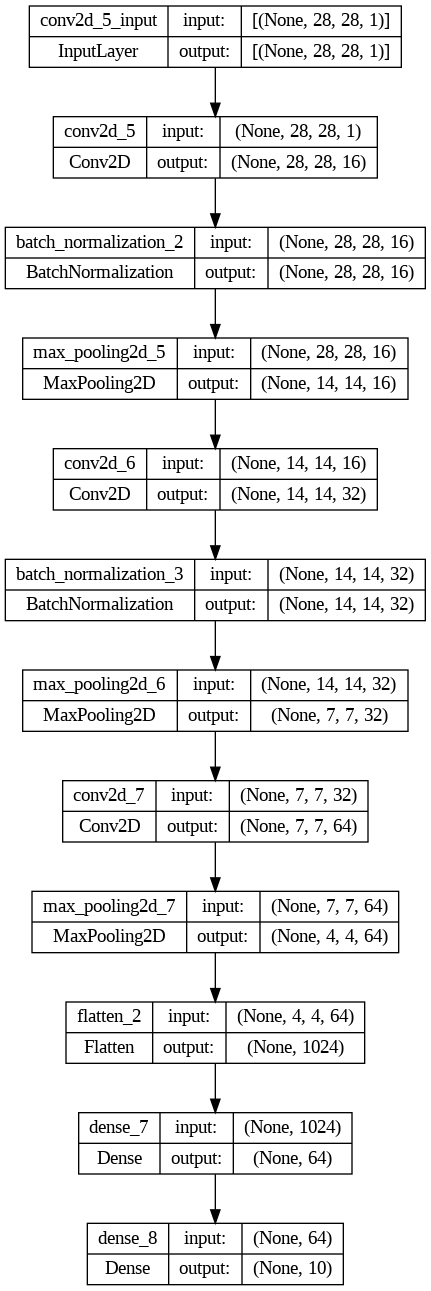

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)


In [16]:
#Conv+Pool, Drop Out 추가한 다른 모형, model1
from tensorflow.keras.layers import Dropout
model1 = Sequential( )
model1.add( Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)) )
model1.add( BatchNormalization() )
model1.add( Conv2D(32,(3,3),padding='same', activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size = (2, 2), padding = 'same') )
model1.add( Dropout(0.25) )

model1.add( Conv2D(64,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(64,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.25))

model1.add( Conv2D(128,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(128,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.5))

model1.add( Flatten() )
model1.add( Dense(256,activation='relu'))
model1.add( BatchNormalization())
model1.add( Dropout(0.5))
model1.add( Dense(10,activation='softmax'))



model1.summary()

model1.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history1 = model1.fit(x_train, y_train, epochs = 1, validation_split=0.1)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

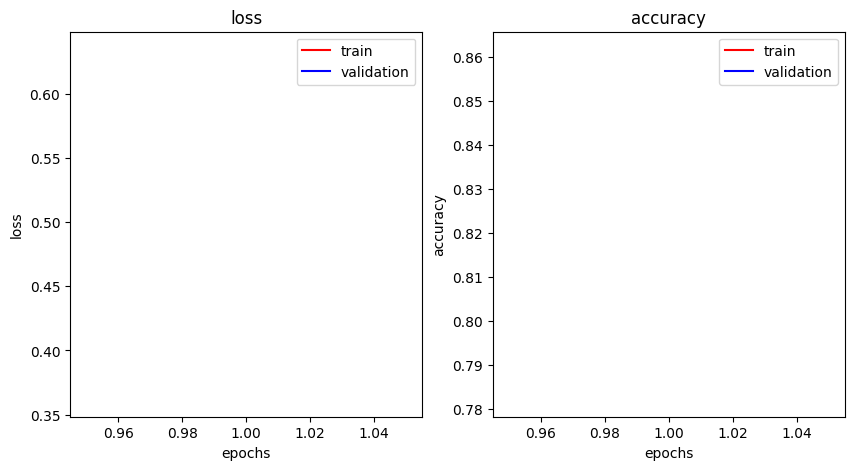

In [17]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history1.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = np.arange(1 )+1 #추후 epoch 늘려서 조정

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 3. Cifar-10 데이터셋으로 분류모형 생성
- 컬러 이미지
- DNN, CNN을 개선
- 온라인에서 자동차사진을 다운로드 후, DNN과 CNN에서 각각 예측

In [18]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
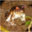

In [19]:
X_train[0]

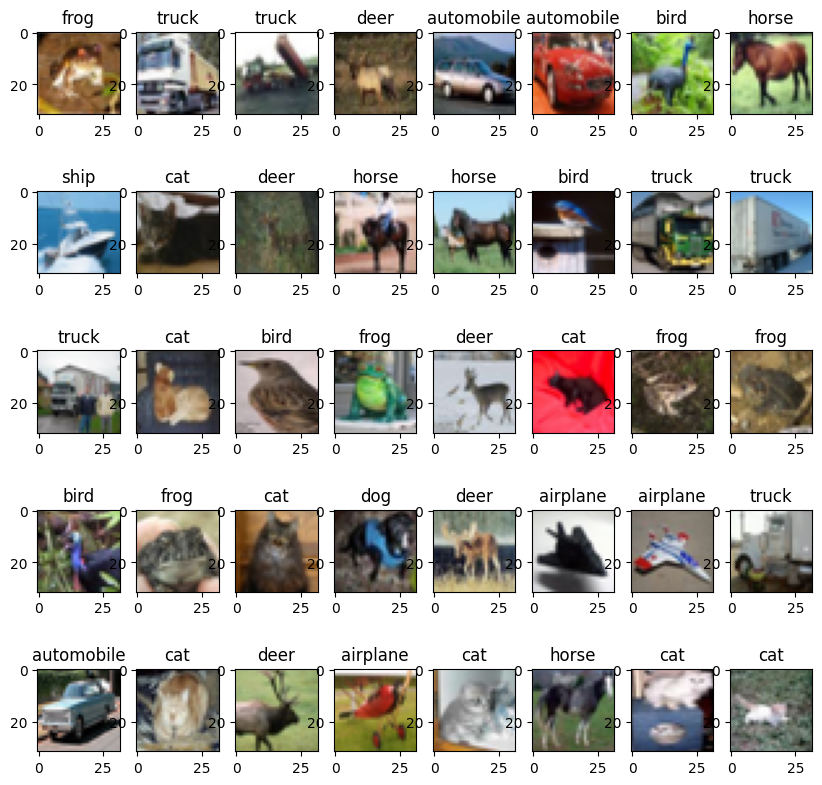

In [20]:
import matplotlib.pyplot as plt
from PIL import Image    # (PIL: 파이썬 이미지 라이브러리)

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
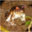

In [21]:
X_train[0]

In [22]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train.shape

(50000, 3072)

In [23]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# 모델 컴파일하기 --- (*4)
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
1407/1407 [==============================] - 9s 5ms/step - loss: 1.9014 - accuracy: 0.3048 - val_loss: 1.7928 - val_accuracy: 0.3380
Epoch 2/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7173 - accuracy: 0.3790 - val_loss: 1.7184 - val_accuracy: 0.3836
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6368 - accuracy: 0.4129 - val_loss: 1.6573 - val_accuracy: 0.4036
Epoch 4/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5783 - accuracy: 0.4340 - val_loss: 1.5576 - val_accuracy: 0.4450
Epoch 5/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5310 - accuracy: 0.4515 - val_loss: 1.5430 - val_accuracy: 0.4448


In [24]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 [==============================] - 1s 3ms/step - loss: 1.5235 - accuracy: 0.4590
정답률= 0.45899999141693115 loss= 1.5234867334365845


In [25]:
hist.history

{'loss': [1.9014490842819214,
  1.7173271179199219,
  1.6368085145950317,
  1.5782688856124878,
  1.5309832096099854],
 'accuracy': [0.30482223629951477,
  0.3790000081062317,
  0.41286665201187134,
  0.4340444505214691,
  0.45153334736824036],
 'val_loss': [1.7927762269973755,
  1.7183586359024048,
  1.6572712659835815,
  1.5576456785202026,
  1.5429855585098267],
 'val_accuracy': [0.33799999952316284,
  0.38359999656677246,
  0.4036000072956085,
  0.4449999928474426,
  0.4447999894618988]}

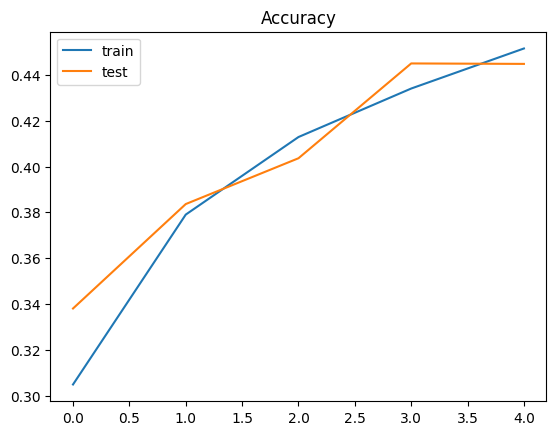

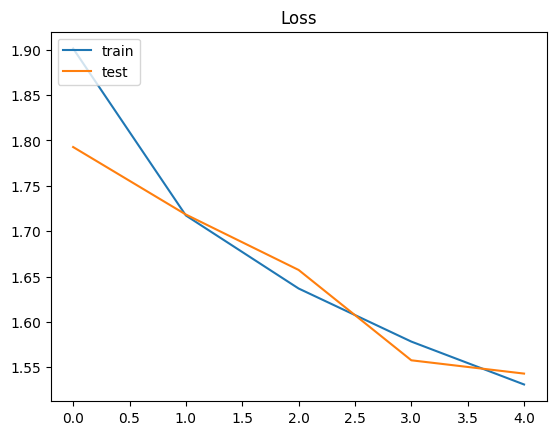

In [26]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- 모형 저장: 가중치의 저장

In [27]:
model.save_weights('cifar10-weight.h5')

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 3746122 (14.29 MB)
Trainable params: 3746122 (14.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 실제 사진에의 적용

In [29]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

In [ ]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

- CNN 적용
 - 위의 모형을 CNN으로 변경

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('cifar10-cnn-weight.h5')

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-cnn-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('파일이름')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])